In [1]:
using Pkg
Pkg.activate(".")

  Activating project at `~/Main/EMAp/Julia_Tutorials/TimeSeries`


In [2]:
using CSV
using DataFrames
using Plots
using StateSpaceModels

airp = CSV.File(StateSpaceModels.AIR_PASSENGERS) |> DataFrame
log_air_passengers = log.(airp.passengers)
steps_ahead = 30

airp[1:10,:]

,month,passengers
,Date,Int64
1,1949-01-01,112
2,1949-02-01,118
3,1949-03-01,132
4,1949-04-01,129
5,1949-05-01,121
6,1949-06-01,135
7,1949-07-01,148
8,1949-08-01,148
9,1949-09-01,136


┌ Warning: The optimization process converged but the Hessian matrix is not positive definite. This means that StateSpaceModels.jl cannot estimate the distribution of the hyperparameters If you are interested in estimates of the distribution of ther hyperparameters we advise you tochange the optimization algorithm by using the kwarg fit(...; optimizer = Optimizer(StateSpaceModels.Optim.THE_METHOD_OF_YOUR_CHOICE()))The list of possible algorithms can be found on this link https://julianlsolvers.github.io/Optim.jl/stable/# otherwise you can simply skip this proccess by using fit(...; save_hyperparameter_distribution=false) 
└ @ StateSpaceModels /home/davibarreira/.julia/packages/StateSpaceModels/sBpbl/src/fit.jl:57


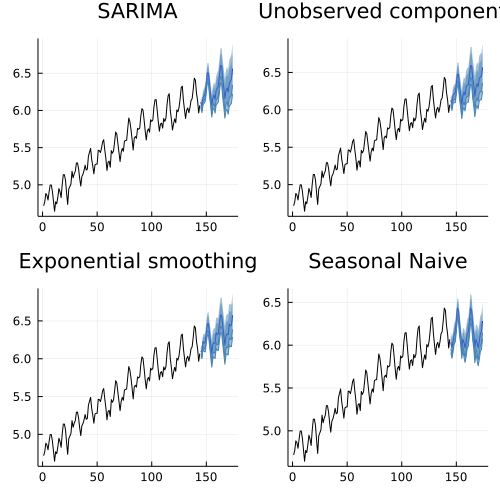

In [3]:
# SARIMA
model_sarima = SARIMA(log_air_passengers; order = (0, 1, 1), seasonal_order = (0, 1, 1, 12))
fit!(model_sarima)
forec_sarima = forecast(model_sarima, steps_ahead)

# Unobserved Components
model_uc = UnobservedComponents(log_air_passengers; trend = "local linear trend", seasonal = "stochastic 12")
fit!(model_uc)
forec_uc = forecast(model_uc, steps_ahead)

# Exponential Smoothing
model_ets = ExponentialSmoothing(log_air_passengers; trend = true, seasonal = 12)
fit!(model_ets)
forec_ets = forecast(model_ets, steps_ahead)

# Naive model
model_naive = SeasonalNaive(log_air_passengers, 12)
fit!(model_naive)
forec_naive = forecast(model_naive, steps_ahead)

plt_sarima = plot(model_sarima, forec_sarima; title = "SARIMA", label = "");
plt_uc = plot(model_uc, forec_uc; title = "Unobserved components", label = "");
plt_ets = plot(model_ets, forec_ets; title = "Exponential smoothing", label = "");
plt_naive = plot(model_ets, forec_naive; title = "Seasonal Naive", label = "");

plot(plt_sarima, plt_uc, plt_ets, plt_naive; layout = (2, 2), size = (500, 500))

In [8]:
model = auto_arima(log_air_passengers; seasonal = 12)
model = auto_arima(log_air_passengers)

SARIMA(3, 1, 2)x(0, 0, 0, 0) with zero mean    

In [16]:
# plot(log_air_passengers)

In [9]:
forec_arima = forecast(model, steps_ahead)
plt_arima = plot(model, forec_arima; title = "ARIMA", label = "");

In [10]:
forec_arima.expected_value

30-element Vector{Vector{Float64}}:
 [6.168065592618456]
 [6.167789008760338]
 [6.183342672397809]
 [6.161490440253129]
 [6.164658643955273]
 [6.1525491716269585]
 [6.157331102661809]
 [6.15237392217093]
 [6.156500826961318]
 [6.153947572372572]
 [6.156436702597535]
 [6.154773664073521]
 [6.156151887402241]
 ⋮
 [6.155635411001916]
 [6.155406289316247]
 [6.155585309892848]
 [6.15544729528925]
 [6.155554699068802]
 [6.155471469176552]
 [6.155535977194936]
 [6.155485880843667]
 [6.155524690609095]
 [6.155494568260951]
 [6.1555179252729]
 [6.155499810871919]

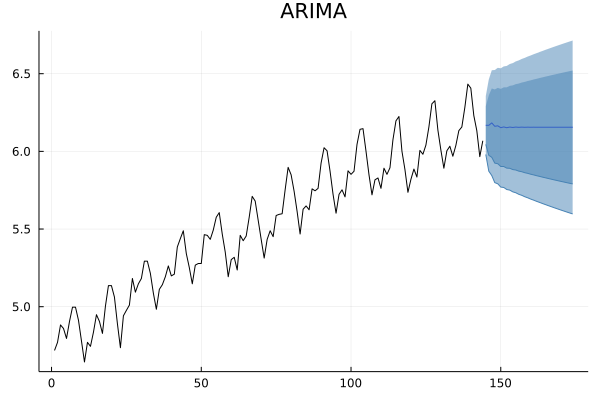

In [11]:
plt_arima